
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Not for Grading

<h2><b>Handwritten Digit Recognition</b></h2>
<b> Problem Statement: </b> <br>
The goal of this project is to create a model that will be able to recognize and determine the handwritten digits from its image by using ML/DL techniques and observe the performance difference between various techniques. <br>
We use MNIST dataset for this task.

<b>MNIST Dataset : </b> <br>
The MNIST dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.
<br>

The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.
Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.


Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

![altxt](https://i.pinimg.com/originals/f2/7a/ac/f27aac4542c0090872110836d65f4c99.jpg)

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "aiml_pg_25" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "4521452411" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "U3W12_Demo_MNIST_MLP" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx pip install torch")
    ipython.magic("sx pip install torchvision")
    ipython.magic("sx pip3 install torchviz")
    ipython.magic("sx wget -qq www.di.ens.fr/~lelarge/MNIST.tar.gz")
    ipython.magic("sx tar -zxvf MNIST.tar.gz")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():

    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts() and getComments():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()

else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


## Importing required library

In [4]:
# Import libraries
import torch
import numpy as np
from matplotlib import pyplot as plt
import torchvision
from torchvision import transforms
from torchvision.datasets import MNIST
import torch.nn as nn
import torch.nn.functional as F

print("All libraries are loaded")

All libraries are loaded


In [5]:
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = MNIST(root = './', train=True, download=True, transform=transform)

In [6]:
print(len(train_data))

60000


In [7]:
train_data, val_data = torch.utils.data.random_split(train_data, [50000, 10000])

test_data = MNIST(root = './', train=False, download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
print("Training data created")
print("Train-Data length : ", len(train_data))

val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
print("Validation data created")
print("Validation-Data length : ", len(val_data))

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
print("Test data created")
print("Test-Data length : ", len(test_data))

Training data created
Train-Data length :  50000
Validation data created
Validation-Data length :  10000
Test data created
Test-Data length :  10000


Some of the training samples and their labels : 



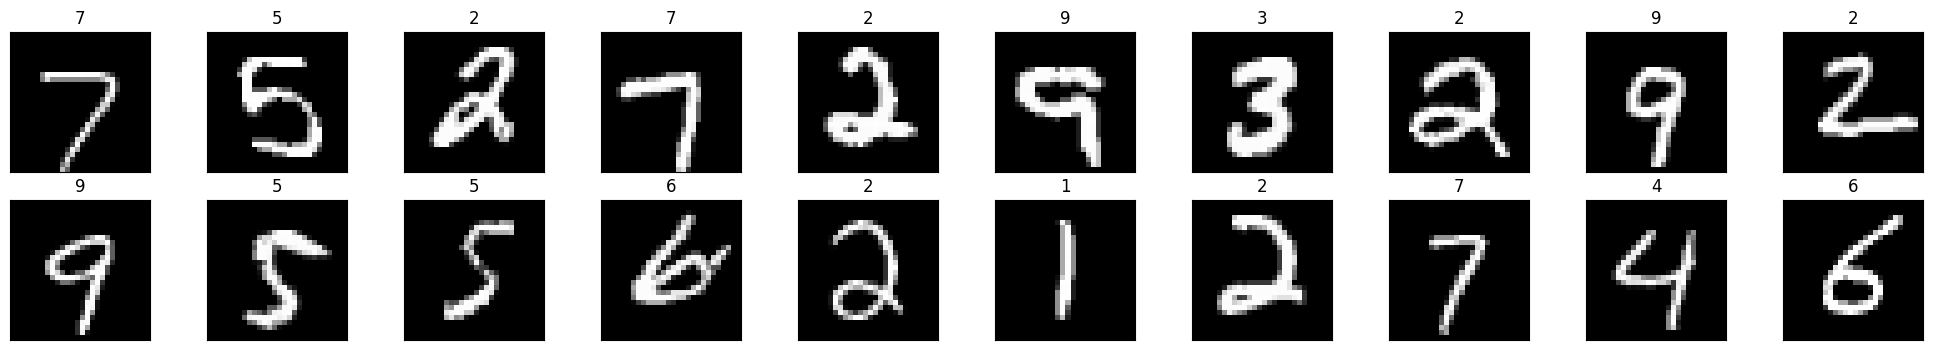

In [8]:
print("Some of the training samples and their labels : \n")

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2,int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

Pixel level View of one of the training sample 




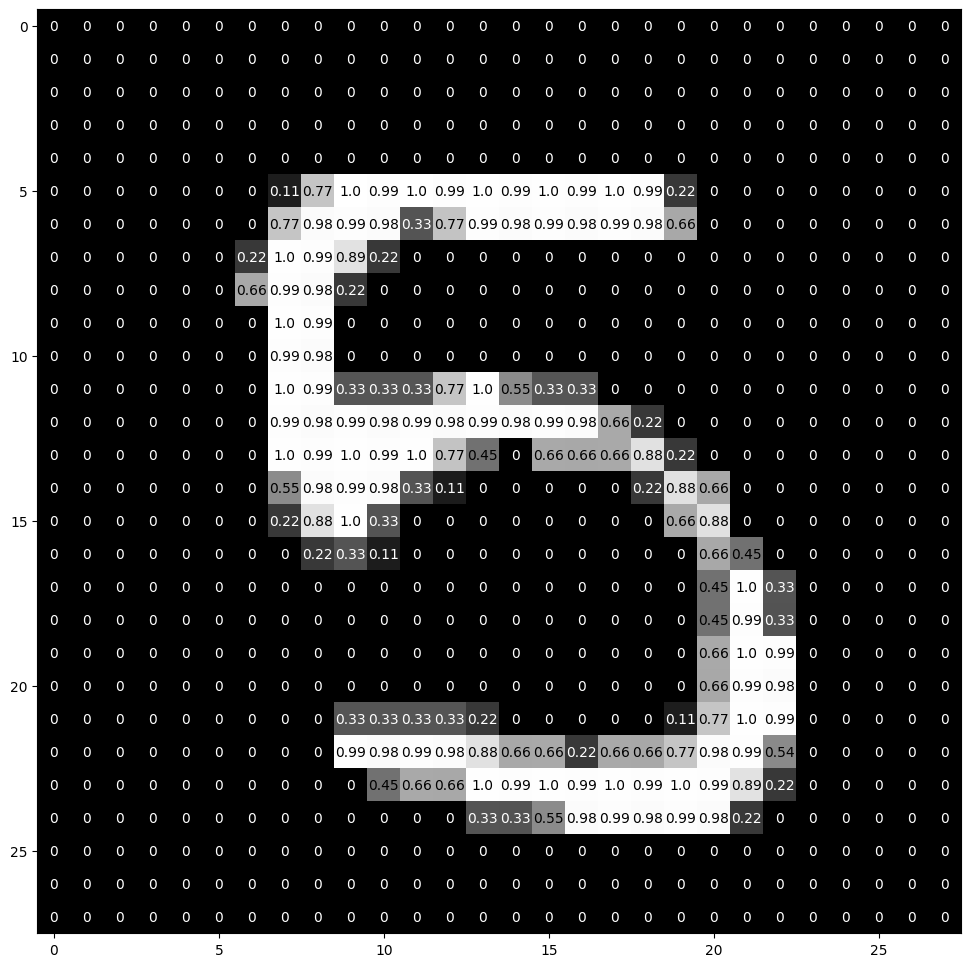

In [9]:
print ("Pixel level View of one of the training sample \n")
img = np.squeeze(images[1])
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

print()

### Initializing CUDA

CUDA is used as an interface between our code and the GPU.

Normally, we run the code in the CPU. To run it in the GPU, we need CUDA. Check if CUDA is available:

In [10]:
# To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

Using PyTorch version: 2.6.0+cu124 CUDA: True


If it's False, then we run the program on CPU. If it's True, then we run the program on GPU.

Let us initialize some GPU-related variables:

In [11]:
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

In [12]:
## Define the NN architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 512)       # linear layer (n_hidden -> hidden_2)
        self.fc3 = nn.Linear(512, 10)        # linear layer (n_hidden -> 10)
        #self.dropout = nn.Dropout(0.2)       # dropout layer (p=0.2) # dropout prevents overfitting of data

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x)) # F.relu
        return x

# initialize the NN
model = Net().to(device)
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


In [13]:
!pip install torchsummary

In [14]:
from torchsummary import summary

In [15]:
summary(model, input_size = (1,784), batch_size = -1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
            Linear-2                  [-1, 512]         262,656
            Linear-3                   [-1, 10]           5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.55
Estimated Total Size (MB): 2.57
----------------------------------------------------------------


In [16]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

print(criterion, optimizer)

CrossEntropyLoss() SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [17]:
# number of epochs to train the model
n_epochs = 20  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):

    train_loss = 0.0                    # Initialize training, val loss
    val_loss=0.0

    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        data=data.to(device)
        target=target.to(device)
        optimizer.zero_grad()            # clear the gradients of all optimized variables
        output = model(data)             # forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(output, target) # calculate the loss
        loss.backward()                  # backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()                 # perform a single optimization step (parameter update)
        train_loss += loss.item()*data.size(0)  # update running training loss

    for data, target in val_loader:
        data=data.to(device)
        target=target.to(device)
        output = model(data)                  # forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(output, target)      # calculate the loss
        val_loss += loss.item()*data.size(0)  # update running training loss

    # print training statistics
    train_loss = train_loss/len(train_loader.dataset)  # calculate average loss over an epoch"""
    val_loss = val_loss/len(val_loader.dataset)        # Validation loss

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format( epoch+1, train_loss, val_loss ))
    print("Training is done\n")

Epoch: 1 	Training Loss: 1.337689 	Validation Loss: 0.835687
Training is done

Epoch: 2 	Training Loss: 0.769810 	Validation Loss: 0.722542
Training is done

Epoch: 3 	Training Loss: 0.702351 	Validation Loss: 0.679824
Training is done

Epoch: 4 	Training Loss: 0.664348 	Validation Loss: 0.650199
Training is done

Epoch: 5 	Training Loss: 0.635790 	Validation Loss: 0.627703
Training is done

Epoch: 6 	Training Loss: 0.613687 	Validation Loss: 0.610102
Training is done

Epoch: 7 	Training Loss: 0.595919 	Validation Loss: 0.596108
Training is done

Epoch: 8 	Training Loss: 0.581134 	Validation Loss: 0.584478
Training is done

Epoch: 9 	Training Loss: 0.568719 	Validation Loss: 0.575107
Training is done

Epoch: 10 	Training Loss: 0.558072 	Validation Loss: 0.567279
Training is done

Epoch: 11 	Training Loss: 0.548813 	Validation Loss: 0.560547
Training is done

Epoch: 12 	Training Loss: 0.540718 	Validation Loss: 0.554855
Training is done

Epoch: 13 	Training Loss: 0.533606 	Validation Lo

In [18]:
# Testing the  model
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    data=data.to(device)
    target=target.to(device)
    output = model(data)                            # forward pass: compute predicted outputs by passing inputs to the model
    loss = criterion(output, target)                # calculate the loss
    test_loss += loss.item()*data.size(0)           # update test loss
    _, pred = torch.max(output, 1)                  # convert output probabilities to predicted class
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))        # compare predictions to true label

    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))
print()

Test Loss: 0.534209

Test Accuracy of     0: 95% (934/980)
Test Accuracy of     1: 98% (1122/1135)
Test Accuracy of     2:  0% ( 0/1032)
Test Accuracy of     3: 97% (986/1010)
Test Accuracy of     4: 98% (965/982)
Test Accuracy of     5: 97% (868/892)
Test Accuracy of     6: 97% (937/958)
Test Accuracy of     7: 97% (1006/1028)
Test Accuracy of     8: 97% (949/974)
Test Accuracy of     9: 96% (973/1009)

Test Accuracy (Overall): 87% (8740/10000)



Test Images and their predicted labels : 



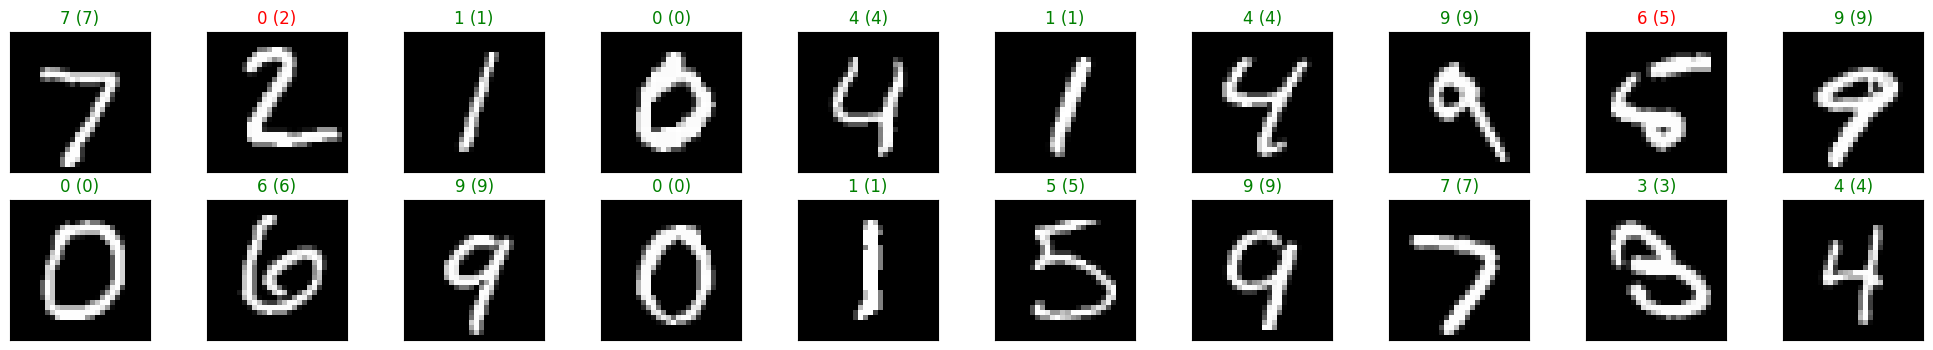

In [19]:
# obtain one batch of test images

print("Test Images and their predicted labels : \n")

dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# get sample outputs
output = model(images)

_, preds = torch.max(output, 1)  # convert output probabilities to predicted class
images = images.cpu()        # prep images for display

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

## Please answer the questions below to complete the experiment:

In [20]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [21]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "sdgfdjhfgjfhjh" #@param {type:"string"}

In [22]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [23]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [24]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7854
Date of submission:  30 Jul 2025
Time of submission:  20:31:21
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
